# Neural network CW
We are using [this](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) data.

# Imports 

In [281]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import style
plt.style.use("dark_background")

# Data setup 
Working with the Breast Cancer Wisconsin Data Set.

Description:
Fetures are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1. ID number
2. Diagnosis: M = malignant, B = benign
3. 3 to 32: ten real-valued features are computed for each cell nucleus:
   1. radius
   2. texture
   3. perimeter
   4. area
   5. smoothness
   6. compactness
   7. concavity
   8. concave points
   9. symmetry
   10. fractal dimension  

**Target**
The class attribute is the Diagnosis (either M or B) which should be predicted using data from column 3 to 32.

In [282]:
data = pd.read_csv("./data/wdbc.data", sep=",", header = None)

In [283]:
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# EDA

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [249]:
data.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


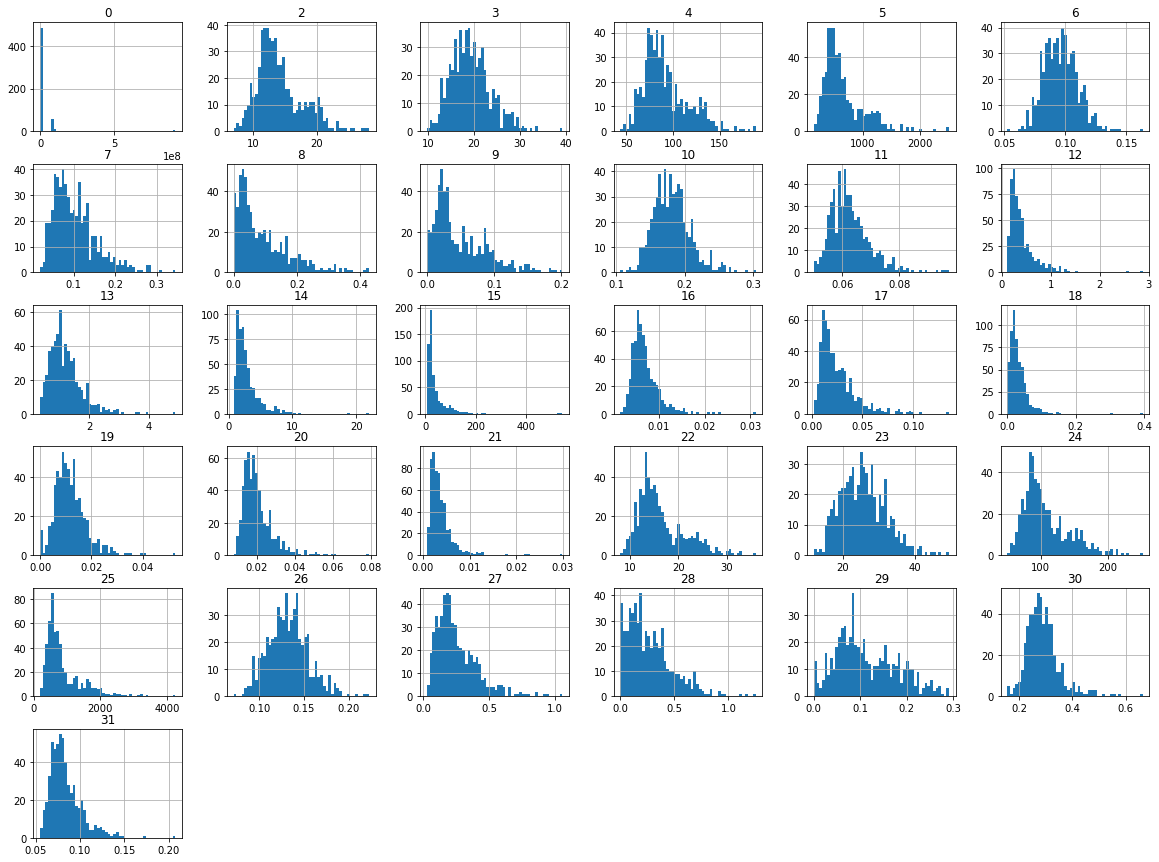

In [250]:
data.hist(bins=50, figsize=(20,15))
plt.show()

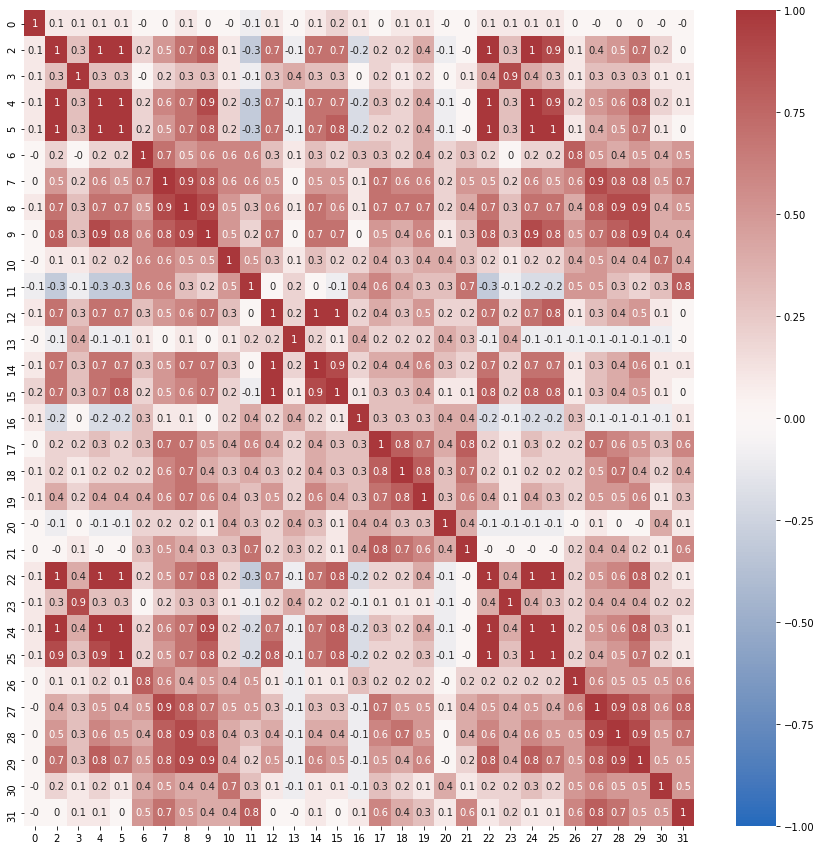

In [251]:
corr_matrix = data.corr().round(1)

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

### Correlation

In [252]:
correlation = data.corr().iloc[1].map(lambda x: abs(x))
correlation.sort_values(ascending=False)

2     1.000000
4     0.997855
5     0.987357
22    0.969539
24    0.965137
25    0.941082
9     0.822529
29    0.744214
15    0.735864
12    0.679090
8     0.676764
14    0.674172
28    0.526911
7     0.506124
27    0.413463
19    0.376169
3     0.323782
11    0.311631
23    0.297008
16    0.222600
17    0.206000
18    0.194204
6     0.170581
30    0.163953
10    0.147741
26    0.119616
20    0.104321
13    0.097317
0     0.074626
21    0.042641
31    0.007066
Name: 2, dtype: float64

# Preprocessing 

In [253]:
df = data.copy()

#### Splitting into X, y 

In [254]:
y = np.array(df.pop(1).apply(lambda x: 0 if x == "M" else 1))
X = np.array(df)

In [255]:
print(X.shape)
print(y.shape)

(569, 31)
(569,)


#### MinMax Scaling

In [256]:
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)

In [257]:
X_scaled[0]

array([0.00091476, 0.52103744, 0.0226581 , 0.54598853, 0.36373277,
       0.59375282, 0.7920373 , 0.70313964, 0.73111332, 0.68636364,
       0.60551811, 0.35614702, 0.12046941, 0.3690336 , 0.27381126,
       0.15929565, 0.35139844, 0.13568182, 0.30062512, 0.31164518,
       0.18304244, 0.62077552, 0.14152452, 0.66831017, 0.45069799,
       0.60113584, 0.61929156, 0.56861022, 0.91202749, 0.59846245,
       0.41886396])

#### Split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle = True) #split 2-8
X_train.shape

(455, 31)

#### Save X, y 

In [259]:
np.save("data/X-data.npy", X_scaled)
np.save("data/y-data.npy", y)

#### Load X, y 

In [260]:
#X = np.load("data/X-data.npy")
#y = np.load("data/y-data.npy")

# Class definitons

In [261]:
# Abstract Class Definitions: 
class Layer():
    def __init__(self): 
        self.inputs = None  # The inputs into this layer. 
        self.outputs = None # The ouputs of this layer. 
        
    # Forward propagation method.
    def forward(self, inputs):
        pass
    
    # Backward propagation method.
    def backward(self):
        pass
    
class Activation():
    def activate():
        pass
    
    def prime():
        pass
    
class Loss():
    def calculate_loss():
        pass

In [262]:
class ReLU(Activation):
    def activate(self, x): 
        return np.maximum(x, 0.0)
    
    def derivative(self, x):
        return (x > 0) * 1  # * 1 to return a number.
    
class Sigmoid(Activation):
    def activate(self, x):
        result = np.mean(1 / (1 + np.exp(-x)))
        return result
    
    def derivative(self, x):
        s = self.activate(x)
        return s * (1 - s)

In [263]:
class CrossEntropyLoss():
    def calculate_loss(self, y_true, y_pred):
        #we add a small value to y_pred as if it is too small or too big we could get from log(0)
        return np.mean(-y_true * np.log(y_pred + 10e-7) - (1 - y_true) * np.log(1 - y_pred+10e-7))
    
    def derivative(self, y_true, y_pred): 
        r = (y_pred - y_true) / y_pred * (1 - y_pred)
        return r
    
class MSELoss():
    def calculate_loss(self, y_true, y_pred):
        return np.mean(1/2 * (y_true - y_pred)**2)
    
    def derivative(self, y_true, y_pred):
        return y_pred - y_true  # (y_true - y_pred) * (-1)

In [264]:
# Dense (fully connected) Layer Class:
class Dense(Layer): 
    def __init__(self, input_size, output_size, activation_function='relu', name='unnamed'):
        self.name = name
        self.weights = np.random.randn(output_size, input_size)
        self.biases = np.zeros((output_size, 1))
        self.outputs = None
        
        if activation_function == 'relu':
            self.activation = ReLU()
        elif activation_function == 'sigmoid':
            self.activation = Sigmoid()
        else:
            self.activation = ReLU()  # Default to ReLU activation function.
        
    def print_weights(self):
        print('Weights:\n', pd.DataFrame(self.weights))
        
    def print_biases(self):
        print('Biases:\n', pd.DataFrame(self.biases))
    
    def forward(self, inputs):
        self.inputs = inputs
        self.outputs = self.activation.activate(np.dot(self.weights, inputs) + self.biases)
        return self.outputs
    
    def backward(self, delta_l, prev_weights, x, learning_rate):                
        delta_l = np.dot(delta_l.T, prev_weights) * self.activation.derivative(self.outputs).T
        prev_weights = self.weights
        gradient = delta_l * np.dot(x, np.ones((1, len(self.outputs))))
        self.weights -= learning_rate * gradient.T 
        return delta_l, prev_weights

In [265]:
class Network:
    def __init__(self, layers, loss_function='cross_entropy'):
        self.layers = layers
        self.output = None
        
        if loss_function == 'cross_entropy':
            self.loss = CrossEntropyLoss()
        elif loss_function == 'mse':
            self.loss = MSELoss()
        else:
            self.loss = CrossEntropyLoss()  # Default to cross entropy loss. 
    
    def fit(self, X_train, y_train, number_epochs, learning_rate=0.001):
        for epoch in range(number_epochs):
            error_v = 0
            
            for x, y in zip(X_train, y_train):
                # Process the forward pass. This goes through every layer.
                x = x.reshape(X.shape[1], 1)  # Create a matrix for dot product in forward()
                y_hat = self.predict(x) 
                
                # Calculate the error after the forward pass. 
                loss = self.loss.calculate_loss(y, y_hat)
                error = self.loss.derivative(y, y_hat)
                error_v += loss  # Add to the error visualisation.
                
                l0 = self.layers[0]
                l1 = self.layers[-1]
                
                # The output layer error.
                delta_l = np.multiply(error, l1.activation.derivative(l1.outputs))
                prev_weights = l1.weights
                l1.weights -= learning_rate * (l1.inputs.T * delta_l)
                
                for layer in reversed(self.layers[:-1]):
                    delta_l, prev_weights = layer.backward(delta_l, prev_weights, x, learning_rate)
            
            error_v /= len(X)
            error_viz.append(error_v)         
                   
    def predict(self, x):
        outputs = x
        for layer in self.layers:
            outputs = layer.forward(outputs)
        self.output = outputs
        return outputs

For backpropagation, the formula for the very last layer is: 
![last-layer-backprop](https://miro.medium.com/max/828/1*zRDMl-GxVO7qENH5dNrZ-g.png)

In [266]:
def print_layer_outputs(network):
    for layer in network.layers:
        print(layer.name, layer.outputs.shape, ':\n', layer.outputs)

# Training

#### Constants and architecture - rerun this every iteration

In [290]:
np.random.seed(10)  # To keep results consistent.
error_viz = []
number_inputs = X.shape[1]
epochs = 300
lr = 0.001

layers = [
    Dense(number_inputs, 1, activation_function='relu', name='Layer '),
    Dense(1, 1, activation_function='sigmoid', name='Layer 2')
]
network = Network(layers, loss_function='cross_entropy')

#### Training loop

In [291]:
%%time
network.fit(X_train, y_train, number_epochs=epochs, learning_rate = lr)
#print_layer_outputs(network)

Wall time: 12.8 s


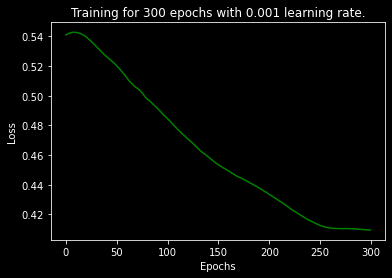

In [295]:
plt.plot(error_viz, c = "g")
plt.title(f"Training for {epochs} epochs with {lr} learning rate.")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Evaluation

In [293]:
def eval(network, X, y_true):
    pred = []
    for xi in X:
        pred.append(network.predict(xi.reshape(X.shape[1], 1)))
    y_pred = list(map(lambda x: 0 if x < 0.5 else 1, pred))
    return accuracy_score(y_true, y_pred)

In [294]:
print(f"Training accuracy: {eval(network, X_train, y_train)*100}")
print(f"Test accuracy: {eval(network, X_test, y_test)*100}")

Training accuracy: 96.48351648351648
Test accuracy: 95.6140350877193
